# HEALTH INSURANCE CROSS SELL PREDICTION

# data wrangling

In [1]:
#read the data
import pandas as pd
import seaborn as sns
import numpy as np

filepath='health-insurance.csv'
data=pd.read_csv(filepath)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
data.drop(['id'],axis=1,inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [4]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:>

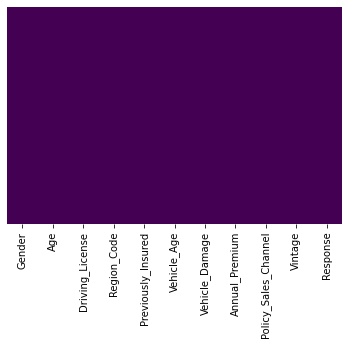

In [5]:
#finding the missing value
import seaborn as sns
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

# exploratory data analysis

<AxesSubplot:xlabel='Response', ylabel='count'>

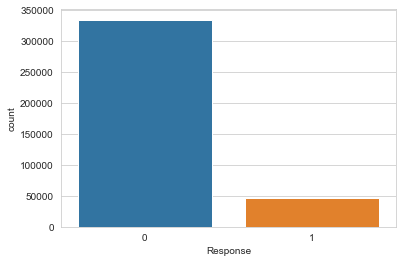

In [6]:
#plot
sns.set_style('whitegrid')
sns.countplot(x='Response',data=data)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

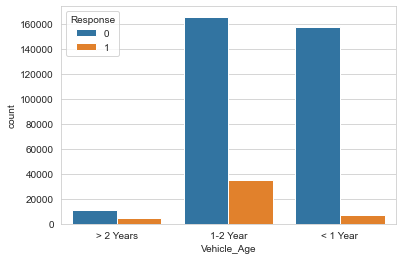

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Vehicle_Age',hue='Response',data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

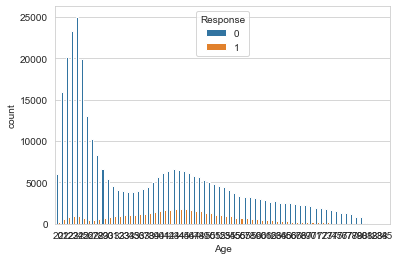

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Response',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

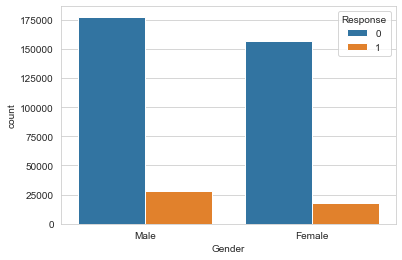

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Response',data=data)

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

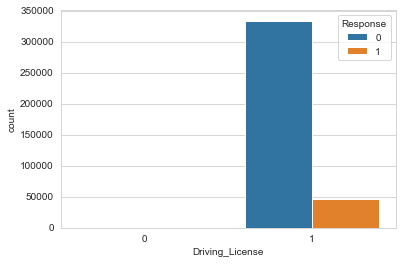

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Driving_License',hue='Response',data=data)

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

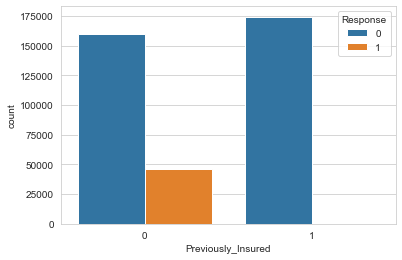

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Previously_Insured',hue='Response',data=data)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

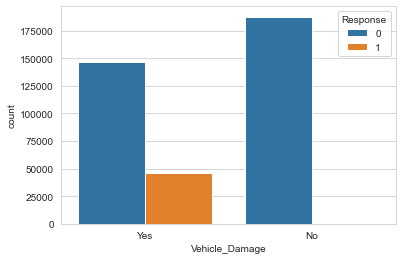

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Vehicle_Damage',hue='Response',data=data)

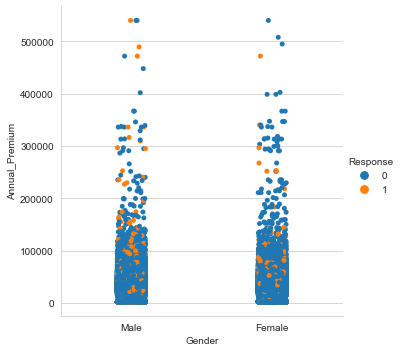

In [13]:
sns.set_style('whitegrid')
sns.catplot(x='Gender',y='Annual_Premium',hue='Response',data=data)

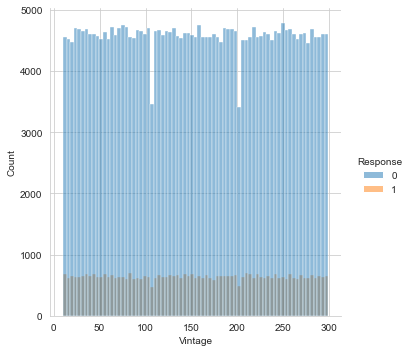

In [14]:
sns.displot(x='Vintage',hue='Response',data=data)

In [15]:
data.drop(['Vintage'],axis=1,inplace=True)

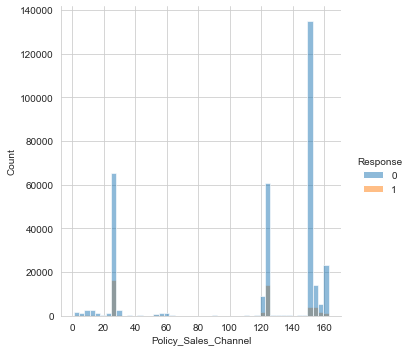

In [16]:
sns.displot(x='Policy_Sales_Channel',hue='Response',data=data)

In [17]:
data.head(100)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
95,Female,23,1,30.0,0,< 1 Year,No,26689.0,152.0,0
96,Male,50,1,28.0,0,1-2 Year,Yes,46995.0,52.0,0
97,Female,62,1,28.0,0,> 2 Years,Yes,41892.0,155.0,0
98,Female,21,1,2.0,0,< 1 Year,Yes,34274.0,152.0,0


In [18]:
#convert the object into int type
pd.get_dummies(data['Gender']).head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [19]:
pd.get_dummies(data['Vehicle_Damage']).head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [20]:
pd.get_dummies(data['Vehicle_Age']).head()

,1-2 Year,< 1 Year,> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [21]:
Gender=pd.get_dummies(data['Gender'])

In [22]:
Vehicle_Age=pd.get_dummies(data['Vehicle_Age'])

In [23]:
Vehicle_Damage=pd.get_dummies(data['Vehicle_Damage'])

In [24]:
data=pd.concat([data,Gender,Vehicle_Age,Vehicle_Damage],axis=1)

In [25]:
data.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [26]:
for i in range(len(data['Region_Code'])):
    if(i>=0 and i<10):
        data['Region_Code']=data['Region_Code'].replace({i:0})
    elif(i>=10 and i<20):
        data['Region_Code']=data['Region_Code'].replace({i:1})
    elif(i>=20 and i<30):
        data['Region_Code']=data['Region_Code'].replace({i:2})
    elif(i>=30 and i<40):
        data['Region_Code']=data['Region_Code'].replace({i:3})
    elif(i>=40 and i<=50):
        data['Region_Code']=data['Region_Code'].replace({i:4})

In [27]:
for i in range(len(data['Policy_Sales_Channel'])):
    if(i>=0 and i<30):
        data['Policy_Sales_Channel']=data['Policy_Sales_Channel'].replace({i:0})
    elif(i>=30 and i<60):
        data['Policy_Sales_Channel']=data['Policy_Sales_Channel'].replace({i:1})
    elif(i>=60 and i<120):
        data['Policy_Sales_Channel']=data['Policy_Sales_Channel'].replace({i:2})
    elif(i>=120 and i<150):
        data['Policy_Sales_Channel']=data['Policy_Sales_Channel'].replace({i:3})
    elif(i>=150 and i<=160):
        data['Policy_Sales_Channel']=data['Policy_Sales_Channel'].replace({i:4})

In [28]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,Female,Male,1-2 Year,< 1 Year,> 2 Years,No,Yes
0,44,1,2.0,0,40454.0,0.0,1,0,1,0,0,1,0,1
1,76,1,0.0,0,33536.0,0.0,0,0,1,1,0,0,1,0
2,47,1,2.0,0,38294.0,0.0,1,0,1,0,0,1,0,1
3,21,1,1.0,1,28619.0,4.0,0,0,1,0,1,0,1,0
4,29,1,4.0,1,27496.0,4.0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,2.0,1,30170.0,0.0,0,0,1,1,0,0,1,0
381105,30,1,3.0,1,40016.0,4.0,0,0,1,0,1,0,1,0
381106,21,1,3.0,1,35118.0,4.0,0,0,1,0,1,0,1,0
381107,68,1,1.0,0,44617.0,3.0,0,1,0,0,0,1,0,1


In [29]:
data.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,Female,Male,1-2 Year,< 1 Year,> 2 Years,No,Yes
Age,1.000000,-0.079782,0.010547,-0.254682,0.067507,-0.077938,0.111147,-0.145545,0.145545,0.692910,-0.787775,0.220694,-0.267534,0.267534
Driving_License,-0.079782,1.000000,0.002139,0.014969,-0.011906,0.007914,0.010155,0.018374,-0.018374,-0.037403,0.040215,-0.006211,0.016622,-0.016622
Region_Code,0.010547,0.002139,1.000000,-0.001183,-0.038598,0.002890,-0.000054,-0.002997,0.002997,0.008559,-0.008977,0.000864,-0.002325,0.002325
Previously_Insured,-0.254682,0.014969,-0.001183,1.000000,0.004269,-0.029819,-0.341170,0.081932,-0.081932,-0.279077,0.358773,-0.191352,0.824143,-0.824143
Annual_Premium,0.067507,-0.011906,-0.038598,0.004269,1.000000,-0.042884,0.022575,-0.003673,0.003673,-0.002495,-0.022555,0.061918,-0.009349,0.009349
Policy_Sales_Channel,-0.077938,0.007914,0.002890,-0.029819,-0.042884,1.000000,0.030323,-0.012221,0.012221,-0.034286,0.042876,-0.020541,-0.037777,0.037777
Response,0.111147,0.010155,-0.000054,-0.341170,0.022575,0.030323,1.000000,-0.052440,0.052440,0.164317,-0.209878,0.109300,-0.354400,0.354400
Female,-0.145545,0.018374,-0.002997,0.081932,-0.003673,-0.012221,-0.052440,1.000000,-1.000000,-0.147633,0.166280,-0.043155,0.091606,-0.091606
Male,0.145545,-0.018374,0.002997,-0.081932,0.003673,0.012221,0.052440,-1.000000,1.000000,0.147633,-0.166280,0.043155,-0.091606,0.091606
1-2 Year,0.692910,-0.037403,0.008559,-0.279077,-0.002495,-0.034286,0.164317,-0.147633,0.147633,1.000000,-0.918704,-0.220402,-0.284717,0.284717


<AxesSubplot:>

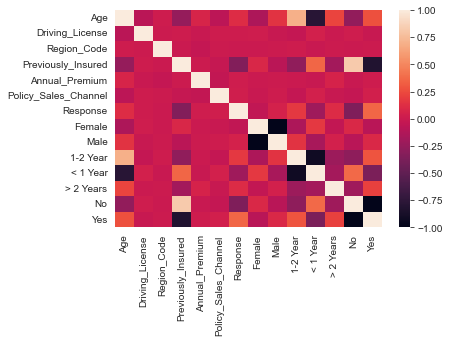

In [30]:
sns.heatmap(data.corr())

In [31]:
data.drop('Response',axis=1).head()
data['Response'].head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

# model prediction

In [32]:
#Split the data set into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Response',axis=1),data['Response'], test_size = 0.3)

 

In [33]:
#Create the model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [34]:
#Train the model and create predictions
LR=LR.fit(X_train, y_train)
predictions= LR.predict(X_test)
# predict probabilities
pred_prob= LR.predict_proba(X_test)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# roc curve for models
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [36]:
#auc score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.8293309046388437


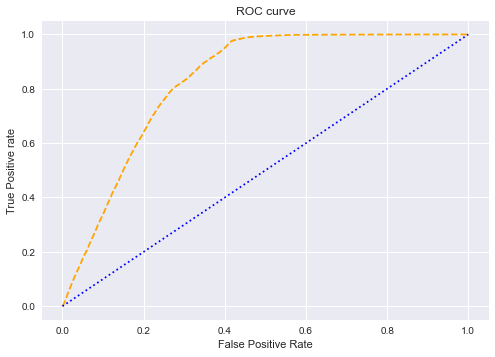

In [37]:
# plot roc curves
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='dashed',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='dotted', color='blue')
# title
plt.title('ROC curve')
#  label x and y axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [38]:
#performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100251
           1       0.31      0.00      0.00     14082

    accuracy                           0.88    114333
   macro avg       0.59      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333



In [39]:
#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
accutracy=confusion_matrix(y_test,predictions)

In [40]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[100183,     68],
       [ 14052,     30]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8765010976708387

# Decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DTC=DecisionTreeClassifier(criterion='gini',max_features=10,max_depth=5)

In [45]:
DTC=DTC.fit(X_train,y_train)

In [46]:
pred=DTC.predict(X_test)

In [47]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.8768334601558605

In [48]:
prob=DTC.predict_proba(X_test)

In [49]:
# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, prob[:,1], pos_label=1)


In [50]:
auc_score3= roc_auc_score(y_test, prob[:,1])

print(auc_score3)

0.8382464119590434
